### importing the needed packages

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

### loading the data from the CSV

In [11]:
df = pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [13]:
print(df.columns)

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')


In [14]:
cdf = df[
    [
        "Clump",
        "UnifSize",
        "UnifShape",
        "MargAdh",
        "SingEpiSize",
        "BareNuc",
        "BlandChrom",
        "NormNucl",
        "Mit",
        "Class",
    ]
]

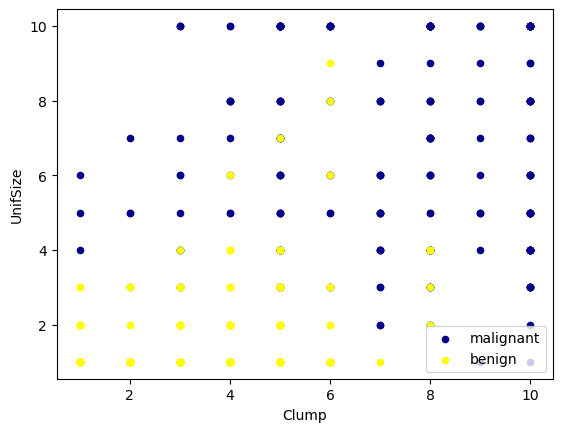

In [15]:
ax = cdf[cdf["Class"] == 4][0:].plot(
    kind="scatter", x="Clump", y="UnifSize", color="DarkBlue", label="malignant"
)
cdf[cdf["Class"] == 2][0:].plot(
    kind="scatter", x="Clump", y="UnifSize", color="Yellow", label="benign", ax=ax
)
plt.show()

In [16]:
cdf.info()  #  5   BareNuc      699 non-null    object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clump        699 non-null    int64 
 1   UnifSize     699 non-null    int64 
 2   UnifShape    699 non-null    int64 
 3   MargAdh      699 non-null    int64 
 4   SingEpiSize  699 non-null    int64 
 5   BareNuc      699 non-null    object
 6   BlandChrom   699 non-null    int64 
 7   NormNucl     699 non-null    int64 
 8   Mit          699 non-null    int64 
 9   Class        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


### Data preprocessing and selection

In [17]:
cdf = cdf[pd.to_numeric(cdf["BareNuc"], errors="coerce").notnull()]
cdf["BareNuc"] = cdf["BareNuc"].astype(int)
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Clump        683 non-null    int64
 1   UnifSize     683 non-null    int64
 2   UnifShape    683 non-null    int64
 3   MargAdh      683 non-null    int64
 4   SingEpiSize  683 non-null    int64
 5   BareNuc      683 non-null    int32
 6   BlandChrom   683 non-null    int64
 7   NormNucl     683 non-null    int64
 8   Mit          683 non-null    int64
 9   Class        683 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 56.0 KB


In [18]:
cdf.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [19]:
cdf.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [20]:
x = cdf[
    [
        "Clump",
        "UnifSize",
        "UnifShape",
        "MargAdh",
        "SingEpiSize",
        "BareNuc",
        "BlandChrom",
        "NormNucl",
        "Mit",
    ]
].values

y = cdf[["Class"]].values

In [21]:
print(cdf[["Class"]].value_counts())

Class
2        444
4        239
Name: count, dtype: int64


### Train and Test dataset

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

print(f"train:\n{x_train.shape, y_train.shape}")

print(f"test:\n{x_test.shape, y_test.shape}")

train:
((546, 9), (546, 1))
test:
((137, 9), (137, 1))


### SVM MODEL

In [23]:
from sklearn.svm import SVC

clf = SVC()
clf = clf.fit(x_train, y_train)

clf

c:\Users\SasanMaleknia\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [24]:
y_hat = clf.predict(x_test)

In [30]:
print(y_hat[:5])
print(y_test[:5].ravel())

[2 4 2 4 2]
[2 4 2 4 2]


### Evaluation

In [31]:
from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_hat)

print(clf_report)

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



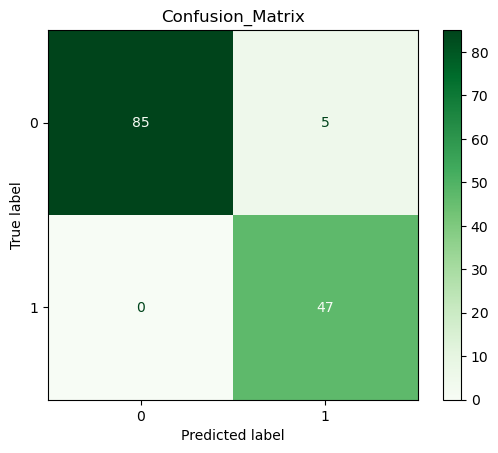

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

c_m = confusion_matrix(y_test, y_hat)
cm_visualization = ConfusionMatrixDisplay(confusion_matrix=c_m)
cm_visualization.plot(cmap="Greens")
plt.title("Confusion_Matrix")
plt.show()